In [1]:
!pip install pandas-profiling==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport



In [71]:
df = pd.read_csv('red_wine.csv')

# will be using SK-learn library for the ML tasks

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score





# Preparing Data to fit the model

In [8]:
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df.type.values)

In [9]:
df


,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,1
1,0.66,0.57,8.3,1
2,0.23,0.44,8.5,0
3,0.44,0.84,8.6,1
4,0.08,0.50,8.7,1
...,...,...,...,...
566,0.40,0.70,12.7,1
567,0.28,0.60,12.8,0
568,0.31,0.60,12.8,0
569,0.34,0.72,12.8,1


In [10]:
le.classes_

array(['high', 'low'], dtype=object)

In [11]:
le.transform(["low","high"])

array([1, 0])

## we can see from the above cells that we have transformed labels into binary categories where "low" category is represented by 1 and "high" is represented as 0

In [12]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("len of x train, x_test : ", len(x_train),", ", len(x_test))
print("len of y train, y_test : ", len(y_train),", ", len(y_test))




len of x train, x_test :  456 ,  115
len of y train, y_test :  456 ,  115


In [13]:
x_train # we can observe the values of test data

array([[ 0.28,  0.64, 10.7 ],
       [ 0.76,  0.68, 10.5 ],
       [ 0.32,  0.55, 12.3 ],
       ...,
       [ 0.3 ,  0.9 , 11.2 ],
       [ 0.74,  0.43, 10.3 ],
       [ 0.37,  0.33, 12.7 ]])

In [14]:
y_train # we can see the catogorical lebels here,  we need to convert this into binary

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,

# Logestic Regression : 

In [44]:
regr = LogisticRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
lr_accuracy_percentage = 100 * accuracy
print("Accuracy on Testing dataset is ", lr_accuracy_percentage)

#use model to predict probability that given y value is 1
y_pred_proba = regr.predict_proba(x_test)[::,1]
#calculate AUC of model
lr_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", lr_auc)




Accuracy on Testing dataset is  81.73913043478261
Area Under the Curve is :  0.903225806451613


# Gaussian NB

In [45]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
nb_accuracy_percentage = 100 * accuracy
print("Accuracy on Testing dataset is ", nb_accuracy_percentage)

#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(x_test)[::,1]
#calculate AUC of model
nb_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", nb_auc)



Accuracy on Testing dataset is  86.08695652173914
Area Under the Curve is :  0.9202678027997565


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
dt_accuracy_percentage = 100 * accuracy
print("Accuracy on Testing dataset is ", dt_accuracy_percentage)

#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(x_test)[::,1]
#calculate AUC of model
dt_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", dt_auc)

Accuracy on Testing dataset is  80.0
Area Under the Curve is :  0.7967133292757153


# SVM

In [47]:
from sklearn.svm import SVC
clf = SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
svm_accuracy = 100 * accuracy
print("Accuracy on Testing dataset is ", svm_accuracy)

#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(x_test)[::,1]
#calculate AUC of model
svm_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", svm_auc)

Accuracy on Testing dataset is  82.6086956521739
Area Under the Curve is :  0.7967133292757153


# RF

ACCURACY OF THE MODEL:  84.34782608695653 

Area Under the Curve is :  0.9300060864272671 



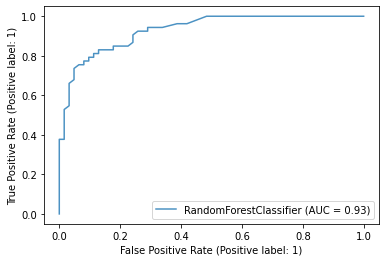

In [48]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
 
rf_accuracy = 100 * (metrics.accuracy_score(y_test, y_pred))
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", rf_accuracy, "\n")


#use model to predict probability that given y value is 1
y_pred_proba = clf.predict_proba(x_test)[::,1]
#calculate AUC of model
rf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", rf_auc, "\n")

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test, ax=ax, alpha=0.8)


# zeroR / one R / Dummy classifier 

In [54]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(x_test)
dummy_accuracy = 100*dummy_clf.score(x_test, y_test)


print("Accuracy on Testing dataset is ", dummy_accuracy)

#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(x_test)[::,1]
#calculate AUC of model
dummy_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", dummy_auc)

Accuracy on Testing dataset is  53.91304347826087
Area Under the Curve is :  0.7967133292757153


# Creating a results Dataframe

In [51]:
# import pandas library as pd
import pandas as pd
  
# create an Empty DataFrame object
df = pd.DataFrame()
  
print(df)
  
# append columns to an empty DataFrame


Empty DataFrame
Columns: []
Index: []


In [55]:
df['Model'] = ['Dummy Classifier', "lr", "NB", "Decision Tree", "SVM", "RF"] 
df['Accuracy'] = [dummy_accuracy, lr_accuracy_percentage, nb_accuracy_percentage, dt_accuracy_percentage, svm_accuracy, rf_accuracy]
df['AUC'] = [dummy_auc, lr_auc, nb_auc, dt_auc, svm_auc, rf_auc]

In [56]:
df

,Model,Accuracy,AUC
0,Dummy Classifier,53.913043,0.796713
1,lr,81.739130,0.903226
2,NB,86.086957,0.920268
3,Decision Tree,80.000000,0.796713
4,SVM,82.608696,0.796713
5,RF,84.347826,0.930006


# Best model when used SKlearn is RF, instead of testing on the training set,  i will use the white wine dataset to test accuracy


In [60]:
df_2 = pd.read_csv('white_wine.csv')

In [65]:
df_2


,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low
...,...,...,...,...
73,0.12,0.36,13.8,high
74,0.24,0.74,13.8,low
75,0.15,0.77,13.8,high
76,0.27,0.27,13.9,high


In [67]:
df_2['type'] = le.fit_transform(df_2.type.values)
df_2

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,1
1,0.49,0.56,9.4,1
2,0.66,0.73,10.0,1
3,0.32,0.77,10.0,1
4,0.38,0.82,10.0,1
...,...,...,...,...
73,0.12,0.36,13.8,0
74,0.24,0.74,13.8,1
75,0.15,0.77,13.8,0
76,0.27,0.27,13.9,0


In [68]:
x_2 = df_2.iloc[:, :-1].values
y_2 = df_2.iloc[:, -1].values
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=0)

ACCURACY OF THE MODEL:  93.75 

Area Under the Curve is :  0.9743589743589745 



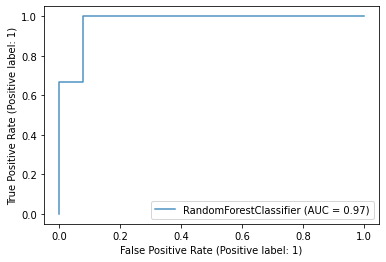

In [69]:

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_2_test)
 
rf_accuracy = 100 * (metrics.accuracy_score(y_2_test, y_pred))
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", rf_accuracy, "\n")


#use model to predict probability that given y value is 1
y_pred_proba = clf.predict_proba(x_2_test)[::,1]
#calculate AUC of model
rf_auc = metrics.roc_auc_score(y_2_test, y_pred_proba)
#print AUC score
print("Area Under the Curve is : ", rf_auc, "\n")

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, x_2_test, y_2_test, ax=ax, alpha=0.8)

# After using the white wine test data,  we can see an improvement in our model's performance. 

Q5) if all the models have comparable results,  i will select decision trees and SVM. we can observe the trees split using some function which will be easy for us to demonstrate how the classification conclusions are derived. 

I would also pick SVM since its has capability to cope with non-linear decision boundaries. In real world the dataset that we obtain are usually noisy and have non-linear boundry. We can also explain how the classification is done using the plots.

both of the models can be easily expressed using some plots which will help the wine tasting experts to understand the working of the models. 